In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings("ignore")

# Анализ фидбека РСЯ компании

In [2]:
feedback_df = pd.read_csv("data/data_01.csv", sep=";", header=3)
feedback_df.replace({',': '.'}, regex=True, inplace=True)
feedback_df.replace({'-': -1}, regex=False, inplace=True)
feedback_df["Дата"] = pd.to_datetime(feedback_df["Дата"], format="%d.%m.%Y")
feedback_df["№ Группы"] = feedback_df["№ Группы"].astype("string")
feedback_df.head()

,Дата,Группа,№ Группы,№ Объявления,Тип объявления,Показы,Взвешенные показы,Клики,CTR (%),wCTR (%),...,Конверсии/Клик по номеру телефона,Рентабельность,Доля рекламных расходов/Клик по email,Доля рекламных расходов/GTM - Отправка всех форм,Доля рекламных расходов/Клик по номеру телефона,Доход (руб.),Прибыль (руб.),Сумма ВC,Цена ВC (руб.),Доля ВC (%)
0,2023-10-09,Брендовые - Общие,5297165573,M-15104907055,Текстово-графическое объявление,28,28.00,0,0.00,0.00,...,-1,-1,-1,-1,-1,0.00,0.00,-1,-1,-1
1,2023-10-09,Брендовые - Общие,5297165573,M-15104907056,Текстово-графическое объявление,3,3.00,0,0.00,0.00,...,-1,-1,-1,-1,-1,0.00,0.00,-1,-1,-1
2,2023-10-09,Брендовые - Общие,5297165573,M-15104907057,Текстово-графическое объявление,1,1.00,0,0.00,0.00,...,-1,-1,-1,-1,-1,0.00,0.00,-1,-1,-1
3,2023-10-09,Танк 300 - Общие,5297165574,M-15104907058,Текстово-графическое объявление,1,1.00,0,0.00,0.00,...,-1,-1,-1,-1,-1,0.00,0.00,-1,-1,-1
4,2023-10-09,Танк 300 - Общие,5297165574,M-15104907059,Текстово-графическое объявление,2,2.00,0,0.00,0.00,...,-1,-1,-1,-1,-1,0.00,0.00,-1,-1,-1


In [3]:
print(f"nan values: {sum(feedback_df.isna().sum().to_list())}")
print(f"размерность:", *feedback_df.shape)
feedback_df.info()

nan values: 0
размерность: 1098 36
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098 entries, 0 to 1097
Data columns (total 36 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   Дата                                              1098 non-null   datetime64[ns]
 1   Группа                                            1098 non-null   object        
 2   № Группы                                          1098 non-null   string        
 3   № Объявления                                      1098 non-null   object        
 4   Тип объявления                                    1098 non-null   object        
 5   Показы                                            1098 non-null   int64         
 6   Взвешенные показы                                 1098 non-null   object        
 7   Клики                                             1098 non-null   int64        

In [4]:
# Числовые данные криво экспортируются из командера
for c in feedback_df.drop(columns=["Дата"]).columns:
    try:
        if c in ["№ Группы"]:
            continue
        isinstance(float(feedback_df[c][0]), float)
        feedback_df[c] = feedback_df[c].astype("float64")
    except ValueError:
        continue
feedback_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098 entries, 0 to 1097
Data columns (total 36 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   Дата                                              1098 non-null   datetime64[ns]
 1   Группа                                            1098 non-null   object        
 2   № Группы                                          1098 non-null   string        
 3   № Объявления                                      1098 non-null   object        
 4   Тип объявления                                    1098 non-null   object        
 5   Показы                                            1098 non-null   float64       
 6   Взвешенные показы                                 1098 non-null   float64       
 7   Клики                                             1098 non-null   float64       
 8   CTR (%)                     

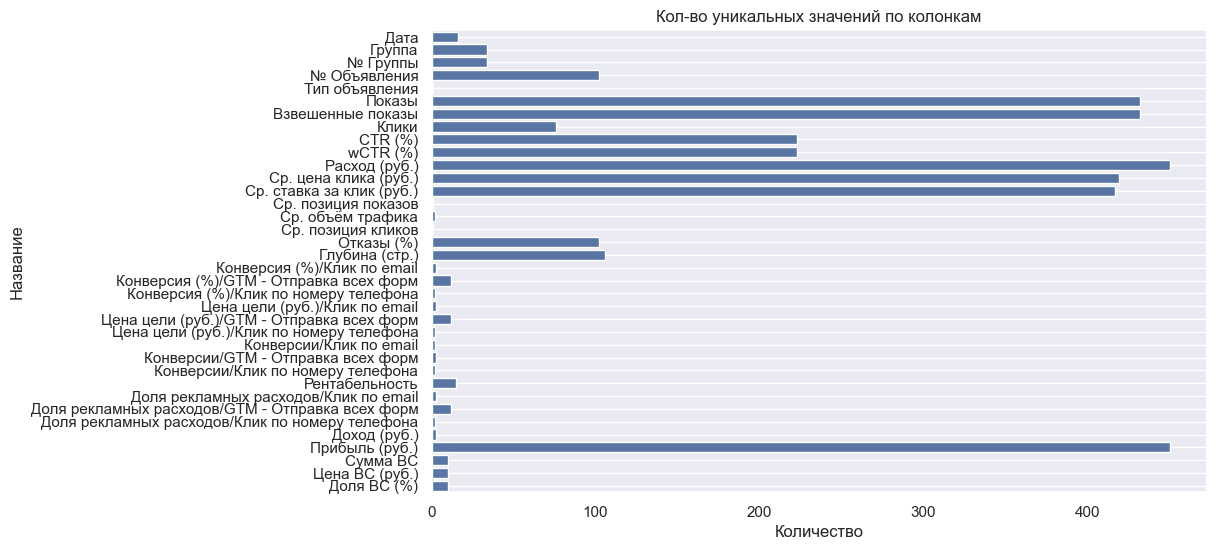

In [5]:
uniq_val_info = {}
for c in feedback_df.columns:
    uniq_val_info[c] = feedback_df[c].nunique()
sns.set_theme()
plt.figure(figsize=(10, 6))
sns.barplot(
    y=uniq_val_info.keys(),
    x=uniq_val_info.values(),
    orient="h"
)
plt.grid()
plt.title("Кол-во уникальных значений по колонкам")
plt.ylabel("Название")
plt.xlabel("Количество")
plt.show()

In [6]:
columns_to_drop = [
    "Дата",
    "Тип объявления",
    "№ Объявления",
    "Доход (руб.)",
    "Доля рекламных расходов/Клик по номеру телефона",
    "Доля рекламных расходов/Клик по email",
    "Конверсии/Клик по номеру телефона",
    "Конверсии/Клик по email",
    "Цена цели (руб.)/Клик по номеру телефона",
    "Ср. позиция кликов",
    "Ср. объём трафика",
    "Ср. позиция показов"
]
analys_df = feedback_df.copy()
analys_df.drop(columns=columns_to_drop, inplace=True)

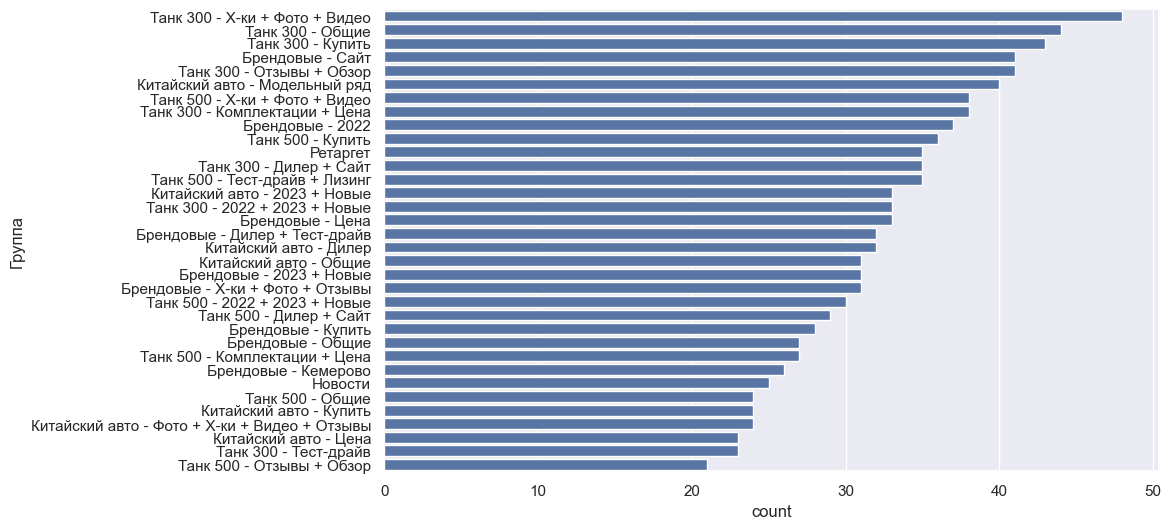

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(
    analys_df["Группа"].value_counts(),
    orient="h",
)
plt.show()

# Кластеризация объявлений

In [8]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [97]:
columns_to_find_corr = [
    "Показы",
    "Взвешенные показы",
    "Клики",
    "CTR (%)",
    "wCTR (%)",
    "Расход (руб.)",
    "Ср. цена клика (руб.)",
    "Ср. ставка за клик (руб.)",
    "Отказы (%)",
    "Глубина (стр.)",
    "Прибыль (руб.)"
]
wcss = {}                    # Сумма внутрикластерных расстояний
percentage_error_diff = {}   # Процентные изменения WCSS
X = pd.get_dummies(analys_df[columns_to_find_corr])

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, max_iter=1000, init="k-means++", random_state=42)
    wcss[i] = kmeans.fit(X).inertia_

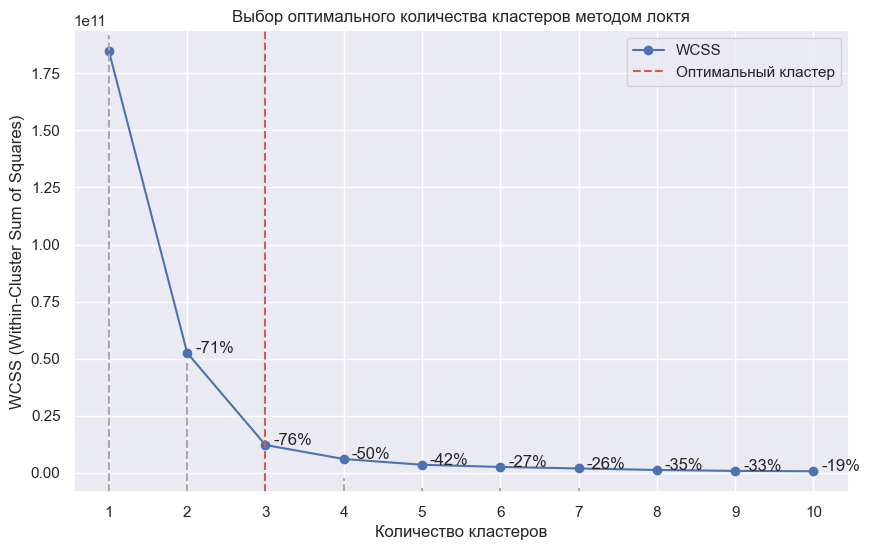

In [10]:
# Строит график метода локтя для выбора оптимального количества кластеров
plt.figure(figsize=(10, 6))
plt.title("Выбор оптимального количества кластеров методом локтя")
plt.xlabel("Количество кластеров")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.xticks(range(1, 11))
plt.plot(wcss.keys(), wcss.values(), marker='o', label="WCSS")

wcss_values = list(wcss.values())
max_val = max(wcss_values)
for i in range(len(wcss_values) - 1):
    diff = wcss_values[i] - wcss_values[i + 1]
    percentage_error_diff[f"{i+1}-{i+2}"] = int(diff * 100 / wcss_values[i])
    plt.text(x=i + 2.1, y=wcss_values[i + 1] + 200, s=f"-{int(diff * 100 / wcss_values[i])}%")
    plt.axvline(x=i + 1, color="darkgray", linestyle="--", ymax=int(wcss_values[i] * 100 / max_val) / 100)
plt.axvline(3, color="indianred", label="Оптимальный кластер", linestyle="--")
plt.legend()
plt.show()

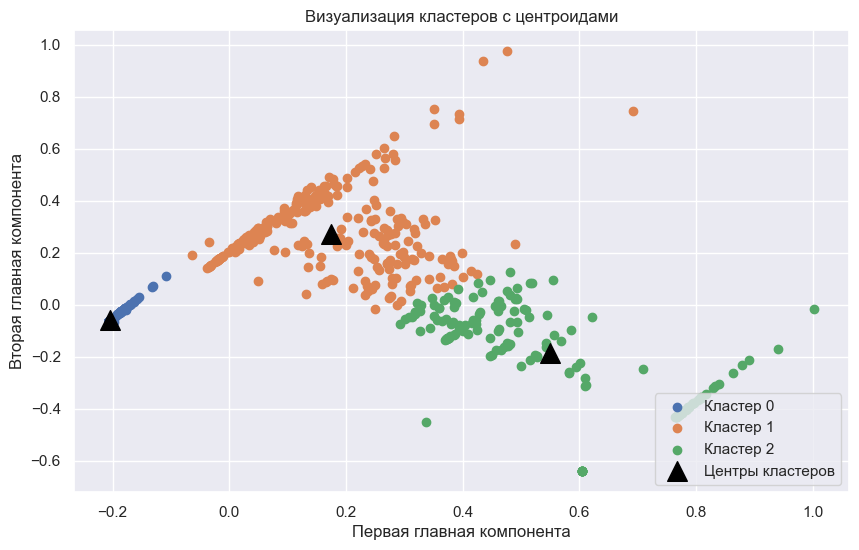

,cluster_id,counting
0,0,673
1,1,257
2,2,168


In [42]:
# Понижение размерности для визуализации
pca = PCA(n_components=2)
pca_df = pca.fit_transform(MinMaxScaler().fit_transform(analys_df[columns_to_find_corr])) 
pca_df = pd.DataFrame(pca_df)
kmeans = KMeans(n_clusters=3, max_iter=1000, init="k-means++", random_state=42)
predict = kmeans.fit_predict(pca_df)
# Визуализация кластров
centroids = kmeans.cluster_centers_
plt.figure(figsize=(10, 6))
for i in np.unique(predict):
    plt.scatter(pca_df.iloc[predict == i, 0], pca_df.iloc[predict == i, 1], label=f'Кластер {i}')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='^', label='Центры кластеров')
plt.legend(loc='lower right')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.title('Визуализация кластеров с центроидами')
plt.show()
sr = pd.DataFrame(pd.Series(predict).value_counts()).reset_index()
sr.columns = ["cluster_id", "counting"]
sr.head()

In [50]:
analys_df["cluster"] = predict
cluster_1 = analys_df.copy().query("cluster==1")
cluster_1[["Ср. цена клика (руб.)", "Глубина (стр.)", "Расход (руб.)", "Клики", "Отказы (%)"]].describe()

,Ср. цена клика (руб.),Глубина (стр.),Расход (руб.),Клики,Отказы (%)
count,257.000000,257.000000,257.000000,257.000000,257.000000
mean,16.953346,1.854942,405.044436,22.241245,10.388521
std,11.396276,0.921862,1358.785501,71.138044,12.766555
min,1.520000,-1.000000,1.520000,1.000000,-1.000000
25%,8.600000,1.140000,18.880000,1.000000,0.000000
50%,15.710000,1.690000,57.780000,4.000000,0.000000
75%,21.420000,2.210000,185.300000,14.000000,20.910000
max,91.210000,6.000000,14919.740000,891.000000,40.000000


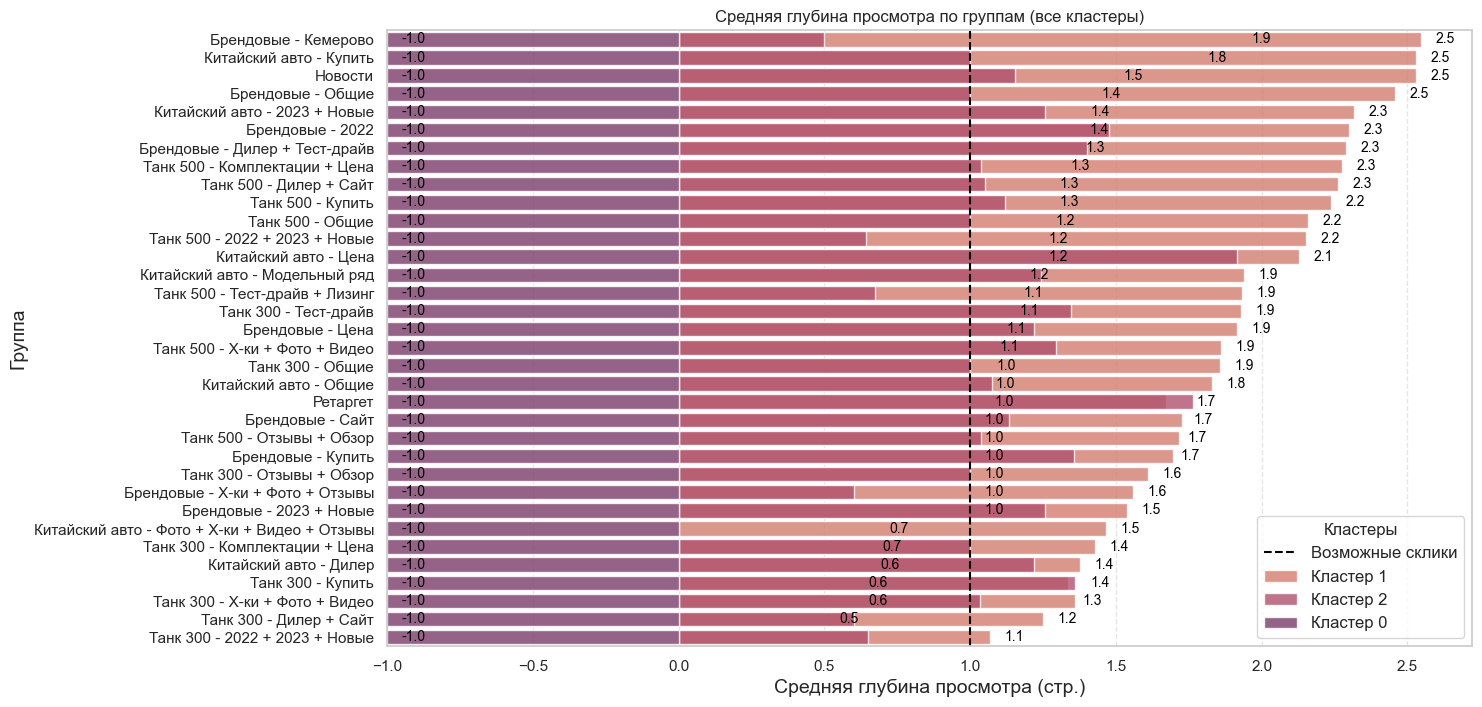

In [192]:
stat = analys_df.groupby(["Группа", "cluster"])["Глубина (стр.)"]\
    .mean()\
    .reset_index()\
    .sort_values(by="Глубина (стр.)", ascending=False)
plt.figure(figsize=(14, 8))
palette = sns.color_palette("flare", len(stat["cluster"].unique()))
sns.set_theme(style="whitegrid", palette="deep")
ax = None
for cluster_id, color in zip(stat["cluster"].unique(), palette):
    cluster_data = stat[stat["cluster"] == cluster_id]
    ax = sns.barplot(
        x=cluster_data["Глубина (стр.)"], 
        y=cluster_data["Группа"], 
        label=f"Кластер {cluster_id}",  
        color=color,
        order=stat["Группа"].unique(),
        alpha=0.8
    )
    for index, value in enumerate(cluster_data["Глубина (стр.)"]):
        ax.text(value + 0.05, index, f"{value:.1f}", va="center", fontsize=10, color="black")
plt.axvline(1, color="black", label="Возможные склики", linestyle="--")
plt.title("Средняя глубина просмотра по группам (все кластеры)")
plt.xlabel("Средняя глубина просмотра (стр.)", fontsize=14)
plt.ylabel("Группа", fontsize=14)
plt.legend(title="Кластеры", loc="lower right", fontsize=12)
plt.xlim(-1)
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.show()
